# Final Project Report

* Class: DS 5100
* Student Name: Trenton Slocum
* Student Net ID: nuf8ms
* This URL: https://github.com/trenton-slocum/DS5100-finalproject-nuf8ms/Trenton_Slocum_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/trenton-slocum/DS5100-finalproject-nuf8ms

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```Python

import numpy as np
import pandas as pd

class Die():
    '''
    Purpose: The purpose of the Die class is to create dice to be used in the Game class. Every created die can can be customized to contain any number of string/number faces, with each face having any desired weight. Dice default as fair, meaning that face weights default to 1.0
    '''
    def __init__(self, face_symbols):
        '''
        Purpose: 
        Creates the die and ensures that the passed face_symbols argument an array with valid face symbols. Sets the weight of each face of the die to the default 1.0.
        
        Parameters: 
        face_symbols - numpy array of desired face symbols. Symbols must be of data type string, integer, or float. All face symbols in array must be of same data type.
        
        Returns: 
        None
        '''
        
        # Test for numpy array
        if not isinstance(face_symbols, np.ndarray):
            raise TypeError('Face Argument must be NumPy array')
          
        # Tests that array is strings or numbers
        if face_symbols.dtype.char not in ['U', 'l', 'd']:
            raise TypeError('Faces must be strings or numbers')
        
        # Tests for unique faces
        if len(set(face_symbols)) != len(face_symbols):
            raise ValueError('Face values must be distinct')
        
        # Initialize weights as 1.0 for each face
        self.faces = face_symbols
        self.weights = [1.0 for i in face_symbols]
        
        # Save faces and weights in private data frame
        self._faces_weights = pd.DataFrame(self.weights, self.faces, columns=['weight'])
        
    def change_side_weight(self, face, new_weight):
        '''
        Purpose: 
        Change the weight of a specific side of the created die.
        
        Parameters:
        face - Face that user would like to change the weight of. Can be of type integer, float, or string. Must already exist on the created die
        new_weight - New weight to be assigned to the passed face. Can be integer or float.
        
        Returns:
        None
        '''
        if face not in self._faces_weights.index:
            raise IndexError('That face does not exist on this die')
        if type(new_weight) not in [int, float]:
            raise ValueError('Weight is not a valid type')
        
        self._faces_weights.loc[face] = new_weight
        
    def roll(self, n = 1):
        '''
        Purpose:
        Roll your created die 'n' number of times and output results
        
        Parameters:
        n - Integer number of desired rolls. Defaults to 1
        
        Returns:
        List of results from rolls
        '''
        results = []
        self.probs = [i/sum(self._faces_weights.weight) for i in self._faces_weights.weight]
        
        for i in range(n):
            result = self._faces_weights.sample(weights = self.probs).index.values[0]
            results.append(result)
            
        return results
        
    def current_state(self):
        '''
        Purpose:
        Show user the current faces and weights of the die
        
        Parameters:
        None
        
        Returns:
        Dataframe of faces on the die with the related weight for each face
        '''
        return self._faces_weights
        
class Game():
    '''
    The purpose of the Game class is to take a list of die objects and roll each of them a specified number of times. The user can then access the results of the most recent play.
    '''
    
    def __init__(self, die_list):
        '''
        Purpose:
        Initialize the game by taking a list of die objects
        
        Parameters:
        die_list - list of die objects. All dice must have the same number of faces
        
        Returns:
        None
        '''
        self.die_list = die_list
    
    def play(self, n):
        '''
        Purpose:
        Roll all dice a specified n number of times to simulate "play." Records all rolls and values.
        
        Parameters:
        n - integer number of times you would like all dice to be rolled. Applies to all dice together, cannot be specific to each
        
        Returns:
        None
        '''
        self.df_index = []
        for i in range(n):
            self.df_index.append('Roll ' + str(i + 1))
        
        self._play_results = pd.DataFrame([], self.df_index)
        
        for die in self.die_list:
            self._play_results.insert(self.die_list.index(die), self.die_list.index(die) + 1, die.roll(n))
    
    def last_round(self, form = 'wide'):
        '''
        Purpose: Print dataframe of all rolls and values from most recent play. Table can be either wide or narrow format, depending on passed preference
        
        Parameters:
        form - Input must be strings 'wide' or 'narrow' to request the respective table. Can be left empty to default to wide table.
        
        Returns:
        Dataframe of results from the most recent play. Format will be either wide or narrow.
        '''
        if form == 'narrow':
            return self._play_results.stack().to_frame('Value')
        elif form == 'wide':
            return self._play_results
        else:
            raise ValueError('Must request for a "narrow" or "wide" table')
        
class Analyzer():
    '''
    The purpose of the Analyzer class is to take the results of a single game object and compute various descriptive statistical properties about it. These statistical properties include: number of jackpots (number of times all faces of the dice were the same for a single roll), the face count for each roll, and the number of combinations and permutations from a game.
    '''
    def __init__(self, game_object):
        '''
        Purpose: Check that passed object is of Game type.
        
        Parameters:
        game_object - Game object that has been played
        
        Returns: None
        '''
        if not isinstance(game_object, Game):
            raise ValueError('Passed value is not a Game object')
        
        self.game = game_object
        
        self.outcome = game_object._play_results
    
    def jackpot(self):
        '''
        Purpose: Counts the frequency of jackpots from a game, or the number of results in which all faces were the same
        
        Parameters:
        None
        
        Returns:
        Prints the number of times a jackpot occured in a game
        '''
        count = 0
        for i in self.outcome.nunique(axis=1) == 1:
            if i == True:
                count += 1
        
        return count
    
    def face_count(self):
        '''
        Purpose:
        Computes how many times a given face was rolled in each roll event
        
        Parameters:
        None
        
        Returns:
        Dataframe where each value corresponds to a roll and face. Value depicts number of times corresponding face appeared in the related roll
        '''
        return pd.DataFrame(self.outcome).apply(pd.Series.value_counts, axis = 1).fillna(0)
    
    def combo_count(self, sort = True):
        '''
        Purpose:
        Computes the distinct combinations of faces rolled and their counts.
        
        Parameters:
        sort - Bool. True to output dataframe sorted by frequency. False to output dataframe sorted by index. Defaults to True.
        
        Returns:
        Dataframe with multiindex of distinct combinations and the associated frequencies.
        '''
        sorted_outcome = self.outcome.apply(sorted, axis = 1, result_type = 'broadcast')
        return sorted_outcome.value_counts(sort = sort).to_frame('Combination Count')
    
    def permutation_count(self, sort = True):
        '''
        Purpose:
        Computes the distinct permutations of faces rolled and their counts.
        
        Parameters:
        sort - Bool. True to output dataframe sorted by frequency. False to output dataframe sorted by index. Defaults to True.
        
        Returns:
        Dataframe with multiindex of distinct permutations and the associated frequencies.
        '''
        return self.outcome.value_counts(sort = sort).to_frame('Permutation Count')

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```Python

from montecarlo.montecarlo import Die, Game, Analyzer
import unittest
import pandas as pd
import numpy as np

class MontecarloTestSuite(unittest.TestCase):
    
    # Die() Class
    def test_1_isarray(self):
        
        with self.assertRaises(TypeError):
            Die([1, 2, 3])
    
    def test_2_array_type(self):
        
        with self.assertRaises(TypeError):
            Die(np.array([True, False]))
    
    def test_3_distinct_faces(self):
        
        with self.assertRaises(ValueError):
            Die(np.array([1, 1, 2]))
    
    def test_4_change_side_weight__face(self):
        die1 = Die(np.array([1, 2, 3]))
        
        with self.assertRaises(IndexError):
            die1.change_side_weight(4, 2)
    
    def test_5_change_side_weight__weight_type(self):
        die1 = Die(np.array([1, 2, 3]))
        
        with self.assertRaises(ValueError):
            die1.change_side_weight(1, 'weight')
    
    def test_6_change_side_weight__weight(self):
        die1 = Die(np.array([1, 2, 3]))
        die1.change_side_weight(1, 4)
        
        expected = 4
        
        self.assertTrue(die1._faces_weights.weight[1] == expected)
    
    def test_7_roll(self):
        die1 = Die(np.array([1, 2, 3]))
        
        expected = 3
        
        self.assertEqual(len(die1.roll(3)), expected)
    
    def test_8_current_state(self):
        die1 = Die(np.array([1, 2, 3]))
        
        expected = pd.DataFrame([1.0, 1.0, 1.0], [1, 2, 3], columns = ['weight'])
        
        self.assertTrue(die1.current_state().equals(expected))
    
    # Game() Class
    def test_9_is_die_list(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
            
        self.assertTrue(isinstance(game1.die_list, list))
        
    def test_10_play(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        expected = (3, 2)
        
        self.assertEqual(game1._play_results.shape, expected)
    
    def test_11_last_round_wide(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        expected = (3, 2)
        
        self.assertEqual(game1.last_round().shape, expected)
    
    def test_12_last_round_narrow(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        expected = (6, 1)
        
        self.assertEqual(game1.last_round('narrow').shape, expected)

    def test_13_last_round_error(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        with self.assertRaises(ValueError):
            game1.last_round('test')
    
    # Analyzer() Class
    def test_14_is_game(self):
        game = 5
        
        with self.assertRaises(ValueError):
            Analyzer(game)
    
    def test_15_jackpot(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        analyzer1 = Analyzer(game1)
        analyzer1.outcome = pd.DataFrame([[1, 1], [1, 0]], [1, 2], columns = [1, 2])
        expected = 1
        
        self.assertEqual(analyzer1.jackpot(), expected)
    
    def test_16_face_count(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        analyzer1 = Analyzer(game1)
        analyzer1.outcome = pd.DataFrame(np.array([[1, 1, 3, 3, 5], [1, 1, 2, 2, 4]]), columns = [1, 2, 3, 4, 5])
        
        expected = pd.DataFrame(np.array([[2.0, 0.0, 2.0, 0.0, 1.0], [2.0, 2.0, 0.0, 1.0, 0.0]]), columns = [1, 2, 3, 4, 5])
        
        self.assertTrue(analyzer1.face_count().equals(expected))
    
    def test_17_combo_count(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        analyzer1 = Analyzer(game1)
        analyzer1.outcome = pd.DataFrame(np.array([[1, 2, 3], [3, 2, 1]]), columns = [1, 2, 3])
        
        expected = (1, 1)
        
        self.assertTrue(analyzer1.combo_count().shape == expected)
        
    def test_18_permutation_count(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die_list = [die1, die2]
        
        game1 = Game(die_list)
        game1.play(3)
        
        analyzer1 = Analyzer(game1)
        analyzer1.outcome = pd.DataFrame(np.array([[1, 2, 3], [3, 2, 1]]), columns = [1, 2, 3])
        
        expected = (2, 1)
        
        self.assertTrue(analyzer1.permutation_count().shape == expected)
        
if __name__ == '__main__':
    unittest.main(verbosity = 3)


```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash

test_10_play (__main__.MontecarloTestSuite.test_10_play) ... ok
test_11_last_round_wide (__main__.MontecarloTestSuite.test_11_last_round_wide) ... ok
test_12_last_round_narrow (__main__.MontecarloTestSuite.test_12_last_round_narrow) ... ok
test_13_last_round_error (__main__.MontecarloTestSuite.test_13_last_round_error) ... ok
test_14_is_game (__main__.MontecarloTestSuite.test_14_is_game) ... ok
test_15_jackpot (__main__.MontecarloTestSuite.test_15_jackpot) ... ok
test_16_face_count (__main__.MontecarloTestSuite.test_16_face_count) ... ok
test_17_combo_count (__main__.MontecarloTestSuite.test_17_combo_count) ... ok
test_18_permutation_count (__main__.MontecarloTestSuite.test_18_permutation_count) ... ok
test_1_isarray (__main__.MontecarloTestSuite.test_1_isarray) ... ok
test_2_array_type (__main__.MontecarloTestSuite.test_2_array_type) ... ok
test_3_distinct_faces (__main__.MontecarloTestSuite.test_3_distinct_faces) ... ok
test_4_change_side_weight__face (__main__.MontecarloTestSuite.test_4_change_side_weight__face) ... ok
test_5_change_side_weight__weight_type (__main__.MontecarloTestSuite.test_5_change_side_weight__weight_type) ... ok
test_6_change_side_weight__weight (__main__.MontecarloTestSuite.test_6_change_side_weight__weight) ... ok
test_7_roll (__main__.MontecarloTestSuite.test_7_roll) ... ok
test_8_current_state (__main__.MontecarloTestSuite.test_8_current_state) ... ok
test_9_is_die_list (__main__.MontecarloTestSuite.test_9_is_die_list) ... ok
----------------------------------------------------------------------
Ran 18 tests in 0.067s
OK

```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo
from montecarlo.montecarlo import Die, Game, Analyzer

Welcome to Montecarlo! Disclaimer: If you are using this program for gambling,      I cannot be held accountable. Have fun losing money!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |  
     |  The purpose of the Analyzer class is to take the results of a single game object and compute various descriptive statistical properties about it. These statistical properties include: number of jackpots (number of times all faces of the dice were the same for a single roll), the face count for each roll, and the number of combinations and permutations from a game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game_object)
     |      Purpose: Check that passed object is of Game type.
     |      
     |      Parameters:
     |      game_object - Game object that has been played
     |      
     |      Returns: None
     |  
     |  combo_count(self, sort=True)
     |      Purpose:
     |      Computes the distinct combina

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/trenton-slocum/DS5100-finalproject-nuf8ms/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash

nuf8ms@rivanna> pip install -e .
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/nuf8ms/DS5100-finalproject-nuf8ms
  Preparing metadata (setup.py) ... done
Installing collected packages: Montecarlo
  Running setup.py develop for Montecarlo
Successfully installed Montecarlo-1.0

```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd

fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))

unfair_coin.change_side_weight('H', 5)

In [4]:
print(fair_coin.current_state())
print(unfair_coin.current_state())

   weight
H     1.0
T     1.0
   weight
H     5.0
T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
fair2flip = Game([fair_coin, fair_coin])

fair2flip.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
unfair2fair1 = Game([unfair_coin, unfair_coin, fair_coin])

unfair2fair1.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
fairlyzer = Analyzer(fair2flip)
unfairlyzer = Analyzer(unfair2fair1)

In [8]:
fairlyzer.jackpot()

480

In [9]:
unfairlyzer.jackpot()

357

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [10]:
fairlyzer_relative_jackpot = (fairlyzer.jackpot()/1000)
unfairlyzer_relative_jackpot = (unfairlyzer.jackpot()/1000)

print(f'Relative Frequency of jackpots for 2 fair coins: {fairlyzer_relative_jackpot}')
print(f'Relative Frequency of jackpots for 2 unfair coins and 1 fair coin: {unfairlyzer_relative_jackpot}')

Relative Frequency of jackpots for 2 fair coins: 0.48
Relative Frequency of jackpots for 2 unfair coins and 1 fair coin: 0.357


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Jackpots of Coins')

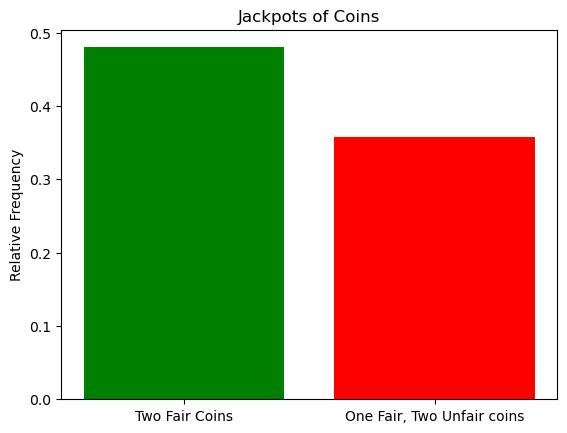

In [11]:
import matplotlib.pyplot as plt

plt.bar(['Two Fair Coins', 'One Fair, Two Unfair coins'], [fairlyzer_relative_jackpot, unfairlyzer_relative_jackpot], color = ['g', 'r'])
plt.ylabel('Relative Frequency')
plt.title('Jackpots of Coins')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [12]:
unfair6 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair1 = Die(np.array([1, 2, 3, 4, 5, 6]))
fair = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [13]:
unfair6.change_side_weight(6, 5)
unfair6.current_state()

,weight
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [14]:
unfair1.change_side_weight(1, 5)
unfair1.current_state()

,weight
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
fair_game = Game([fair, fair, fair, fair, fair])

fair_game.play(10000)

fair_game.last_round()

,1,2,3,4,5
Roll 1,1,5,5,2,2
Roll 2,5,4,1,3,6
Roll 3,5,5,4,2,3
Roll 4,1,2,2,4,5
Roll 5,2,6,2,3,4
...,...,...,...,...,...
Roll 9996,2,5,5,2,3
Roll 9997,1,6,2,4,5
Roll 9998,2,3,5,1,3
Roll 9999,2,6,6,1,3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
unfair_game = Game([unfair6, unfair1, fair, fair, fair])

unfair_game.play(10000)

In [17]:
unfair_game.last_round()

,1,2,3,4,5
Roll 1,6,2,5,1,5
Roll 2,6,6,5,4,4
Roll 3,6,1,4,4,3
Roll 4,1,5,2,6,6
Roll 5,2,1,3,2,2
...,...,...,...,...,...
Roll 9996,3,6,6,1,2
Roll 9997,6,1,5,2,1
Roll 9998,5,1,4,5,6
Roll 9999,1,1,4,4,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [18]:
fair_game_lyzer = Analyzer(fair_game)
unfair_game_lyzer = Analyzer(unfair_game)

In [19]:
fair_game_jps = fair_game_lyzer.jackpot() / 10000
unfair_game_jps = unfair_game_lyzer.jackpot() / 10000

In [20]:
print(f'Relative Frequency of jackpots for 5 fair dice: {round(fair_game_jps, 4)}')
print(f'Relative Frequency of jackpots for 2 unfair dice and 3 fair dice: {unfair_game_jps}')

Relative Frequency of jackpots for 5 fair dice: 0.0009
Relative Frequency of jackpots for 2 unfair dice and 3 fair dice: 0.0006


Text(0.5, 1.0, 'Jackpots of 5 Dice')

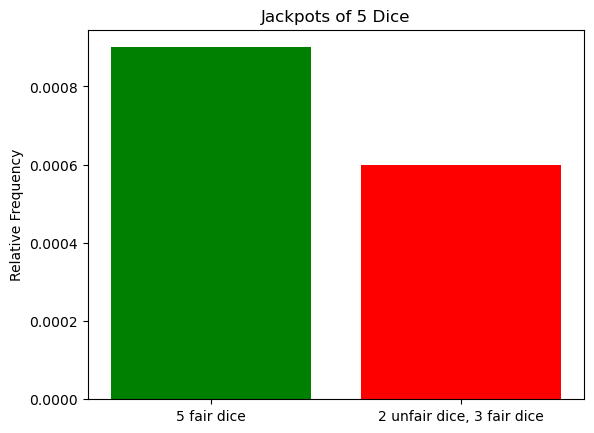

In [21]:
plt.bar(['5 fair dice', '2 unfair dice, 3 fair dice'], [fair_game_jps, unfair_game_jps], color = ['g', 'r'])
plt.ylabel('Relative Frequency')
plt.title('Jackpots of 5 Dice')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [22]:
letters = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

In [23]:
letter_die = Die(np.array(letters))

In [86]:
letter_freq = pd.read_csv('english_letters.txt', header=None, sep=' ')
letter_freq

,0,1
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057
5,N,313720540
6,S,294300210
7,R,277000841
8,H,216768975
9,L,183996130


In [25]:
for i, let in enumerate(letter_freq[0]):
    letter_die.change_side_weight(let, int(letter_freq[1][i]))

In [26]:
letter_die.current_state()

,weight
A,374061888.0
B,70195826.0
C,138416451.0
D,169330528.0
E,529117365.0
F,95422055.0
G,91258980.0
H,216768975.0
I,320410057.0
J,9613410.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [112]:
scrabble = Game([letter_die, letter_die, letter_die, letter_die])
scrabble.play(1000)

In [113]:
scrabble.last_round()

,1,2,3,4
Roll 1,A,L,T,Y
Roll 2,H,E,O,I
Roll 3,R,G,T,A
Roll 4,V,V,A,S
Roll 5,O,N,H,W
...,...,...,...,...
Roll 996,O,E,H,L
Roll 997,I,T,N,T
Roll 998,P,I,S,M
Roll 999,D,W,A,I


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [74]:
scrabble_words = pd.read_csv('scrabble_words.txt', header=None)
scrabble_words

,0
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
...,...
279491,ZYTHUMS
279492,ZYZZYVA
279493,ZYZZYVAS
279494,ZZZ


In [115]:
scrabblelyzer = Analyzer(scrabble)

In [116]:
scrab_perms = scrabblelyzer.permutation_count(False)
scrab_perms

Permutation Count
1 2 3 4                   
A A D T                  1
    E E                  1
      H                  1
      T                  1
    H T                  1
...                    ...
Y R S X                  1
  T F N                  1
    L N                  1
    O N                  1
Z D C K                  1

[995 rows x 1 columns]

In [117]:
perms_list = []
for i in range(len(scrab_perms)):
    perms_list.append(''.join(scrab_perms.iloc[i].name[:4]))

In [130]:
count = 0
words = []
for i in perms_list:
    if i in scrabble_words[0].values:
        count += 1
        words.append(i)
        
count

45

In [131]:
words

['AITS',
 'ALTO',
 'ANNA',
 'ANOA',
 'ATES',
 'BODS',
 'CETE',
 'CIEL',
 'CODS',
 'CUTE',
 'DEER',
 'DENI',
 'EDIT',
 'EPEE',
 'ERNE',
 'ETNA',
 'EVEN',
 'FLAY',
 'GALA',
 'GAOL',
 'GETS',
 'GULE',
 'HAST',
 'HOSE',
 'IRES',
 'LETS',
 'MATT',
 'MEOU',
 'MOOT',
 'OARY',
 'OBIA',
 'OBOL',
 'PHAT',
 'PROS',
 'RAID',
 'REND',
 'SAIC',
 'SESS',
 'SLIP',
 'SORT',
 'STAR',
 'STIE',
 'TENT',
 'THAR',
 'UNIT']

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [121]:
scrabble5 = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
scrabble5.play(1000)

In [122]:
scrabblelyzer5 = Analyzer(scrabble5)

In [123]:
scrab_perms5 = scrabblelyzer5.permutation_count(False)
scrab_perms5

Permutation Count
1 2 3 4 5                   
A A C N M                  1
    D R P                  1
    I I R                  1
    T S I                  1
    V C A                  1
...                      ...
Y S R R N                  1
  T D C O                  1
    M A W                  1
Z E O R X                  1
  Y H M G                  1

[1000 rows x 1 columns]

In [126]:
perms_list5 = []
for i in range(len(scrab_perms5)):
    perms_list5.append(''.join(scrab_perms5.iloc[i].name[:5]))

In [128]:
count = 0
words = []
for i in perms_list5:
    if i in scrabble_words[0].values:
        count += 1
        words.append(i)
        
count

6

In [129]:
words

['CHOLA', 'INERM', 'NEIGH', 'SEFER', 'SOREL', 'TENOR']